In [1]:
#importing packages
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import os
import torchvision.transforms as transforms

In [2]:
#configure device
device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [18]:
#define hyper parameters
num_epochs=3
batch_size=100
learning_rate=0.001
input_dim=90
hidden_dim=56
output_dim=1


In [4]:
os.mkdir("mydata")

In [7]:
#cleaning data and selecting features
data_filepath="../input/nifty50-stock-market-data/"
for i in os.listdir(data_filepath):
    df=pd.read_csv(data_filepath+i)
    df=df.dropna()
    if len(df)==2456:
        #o=df["Open"]
        #c=df["Close"]
        #l=df["Low"]
        #h=df["High"]
        #d=df["%Deliverble"]
        #df["oc"]=o-c
        #df["ho"]=h-o
        #df["ol"]=o-l
        #df["gap"]=o-df["Prev Close"]
        df2=df[["Close","Open","Prev Close"]]
        df2.to_csv("mydata/"+i)
        print("file added")


file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added
file added


In [8]:
print(df2.head())
print(df2.iloc[2455])

      Close    Open  Prev Close
903  100.65  100.55      101.05
904   99.25  100.00      100.65
905  101.00   99.25       99.25
906  101.50  100.80      101.00
907  101.45  101.15      101.50
Close         220.05
Open          217.75
Prev Close    220.15
Name: 3358, dtype: float64


In [9]:
x=os.listdir("mydata/")

print(len(x))

49


In [12]:
print(df2.iloc[1].shape)

(3,)


In [25]:
#creating custom dataset
class Mydataset(Dataset):
    def __init__(self,root,train):
        super(Mydataset,self).__init__()
        self.root=root
    
        self.train=train
        if train:
            self.x=os.listdir(self.root)[0:30]
        else:
            self.x=os.listdir(self.root)[30:]
        
    def __len__(self):
        if self.train:
            return 30*2426
        return 19*2426
    def __getitem__(self,idx):
        index=idx//2426
        file=self.x[index]
        idx=idx%2426
        df=pd.read_csv(self.root+"/"+file)
        x_value=df.iloc[idx:idx+30][["Close","Open","Prev Close"]]
        x_value=np.array(x_value).reshape(-1)
        y_value=df.iloc[idx+30]["Open"]
        y_value=np.array(y_value)
        x_value=torch.tensor(x_value)
        y_value=torch.tensor(y_value)
        return x_value,y_value
        
        
        
        
    

In [26]:
#loading data
train_dataset=Mydataset(root="mydata",train=True)
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_dataset=Mydataset(root="mydata",train=False,)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [28]:
#defining network
class network(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        super(network,self).__init__()
        self.fc1=nn.Linear(input_dim,102)
        self.fc2=nn.Linear(102,hidden_dim)
        self.fc3=nn.Linear(hidden_dim,28)
        self.fc4=nn.Linear(28,1)
    def forward(self,x):
       
        out=self.fc1(x)
        out=self.fc2(out)
        out=self.fc3(out)
        out=self.fc4(out)
        return out
    
model=network(input_dim,hidden_dim,output_dim).to(device)    
    
        

In [29]:
#define loss func and optim
criterion=nn.L1Loss()
optim=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [30]:
#training
loss_g=[]
for epoch in range(num_epochs):
    for i,(x_values,y_values) in enumerate(train_loader):
        x_values=x_values.reshape(-1,input_dim).to(device)
        y_values=y_values.float().to(device)
        pred=model(x_values.float())
        y_values=y_values.reshape(pred.shape)
        loss=criterion(pred,y_values)
        optim.zero_grad()
        loss.backward()
        optim.step()
        if i%100==0:
            print("epoch :[{}/{}] loss:[{}]".format(epoch+1,num_epochs,loss.item()))
            loss_g.append(loss.item())
            
        
        

epoch :[1/3] loss:[1952.4990234375]
epoch :[1/3] loss:[86.28142547607422]
epoch :[1/3] loss:[78.39495086669922]
epoch :[1/3] loss:[46.453128814697266]
epoch :[1/3] loss:[48.23680877685547]
epoch :[1/3] loss:[64.288818359375]
epoch :[1/3] loss:[101.1307144165039]
epoch :[1/3] loss:[27.21849250793457]
epoch :[2/3] loss:[29.4254150390625]
epoch :[2/3] loss:[78.54235076904297]
epoch :[2/3] loss:[25.57010269165039]
epoch :[2/3] loss:[39.92385482788086]
epoch :[2/3] loss:[95.2979507446289]
epoch :[2/3] loss:[55.19744873046875]
epoch :[2/3] loss:[43.38809585571289]
epoch :[2/3] loss:[61.88622283935547]
epoch :[3/3] loss:[65.19566345214844]
epoch :[3/3] loss:[34.294830322265625]
epoch :[3/3] loss:[42.285850524902344]
epoch :[3/3] loss:[27.76148796081543]
epoch :[3/3] loss:[36.7430305480957]
epoch :[3/3] loss:[65.27584075927734]
epoch :[3/3] loss:[45.79500198364258]
epoch :[3/3] loss:[124.01577758789062]


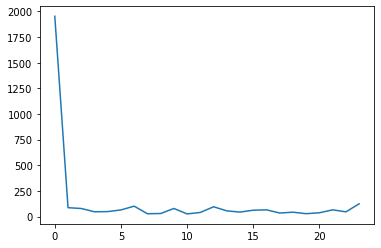

In [31]:
plt.plot(loss_g)

plt.show()

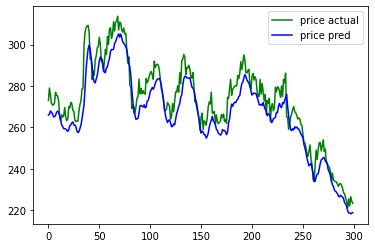

In [38]:
y_gvalues=[]
pred_values=[]
for i in range (4000,4300):
    pred=model(test_dataset[i][0].float().to(device))
    pred_values.append(pred)
    y_gvalues.append(test_dataset[i][1])
plt.plot(y_gvalues,color="green",label="price actual")
plt.plot(pred_values,color="blue",label="price pred")

plt.legend()
plt.show()
